# AirBnB NY Locations Data Case Study

In this final project, you task will be to take the data provided and find evidance to answer the following questions.

1. Which hosts are the busiest and why?
2. How many neighborhood groups are available and which shows up the most?
3. Are private rooms the most popular in manhattan?
4. Which hosts are the busiest and based on their reviews?
5. Which neighorhood group has the highest average price?
6. Which neighborhood group has the highest total price?
7. Which top 5 hosts have the highest total price?
8. Who currently has no (zero) availability with a review count of 100 or more?
9. What host has the highest total of prices and where are they located?
10. When did Danielle from Queens last receive a review?

You will be given **4 hours** to complete this assignment. 
**Be Advised** I will go dark for this intire assignment time period. That said, any questions that you would like to ask about the data, or the project **MUST** be asked before the time starts. Once the time has started, I can no longer give information.

This is to similate what you will face when you are out in the wild. 

Happy Coding!

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
air_bnb = pd.read_csv('AB_NYC_2019.csv')
air_bnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,10/19/2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,5/21/2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,7/5/2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,11/19/2018,0.10,1,0


In [27]:
# How many neighborhood groups are available and which shows up the most?

air_bnb_neighborhood_group_count = air_bnb.copy()
air_bnb_neighborhood_group_count['neighborhood_group_count'] = 1
air_bnb_neighborhood_group_count = air_bnb_neighborhood_group_count[['neighbourhood_group', 'neighborhood_group_count']].groupby(['neighbourhood_group']).count().sort_values(by = ['neighborhood_group_count'], ascending = False)
air_bnb_neighborhood_group_count

## Answer: There are five neighborhood groups available, with Manhattan showing up the most.

,neighborhood_group_count
neighbourhood_group,
Manhattan,21661
Brooklyn,20104
Queens,5666
Bronx,1091
Staten Island,373


In [34]:
# Are private rooms the most popular in manhattan?

air_bnb_room_type_count = air_bnb.copy()
air_bnb_room_type_count['room_type_count'] = 1
air_bnb_room_type_count_manhattan = air_bnb_room_type_count[air_bnb_room_type_count['neighbourhood_group'] == 'Manhattan']
air_bnb_room_type_count_manhattan = air_bnb_room_type_count_manhattan[['room_type', 'room_type_count']].groupby(['room_type']).count()
air_bnb_room_type_count_manhattan


## Answer: No, entire home/apt is the most popular room type in Manhattan.

,room_type_count
room_type,
Entire home/apt,13199
Private room,7982
Shared room,480


In [44]:
# Which hosts are the busiest and based on their reviews?

air_bnb_busiest = air_bnb.copy()
air_bnb_busiest = air_bnb_busiest[['host_name', 'number_of_reviews']].groupby(['host_name']).sum(['number_of_reviews']).sort_values(by = ['number_of_reviews'], ascending = False)
air_bnb_busiest.head()


## Answer: Based on the number of reviews, the busiest hosts are Michael, David, John, Jason, and Alex.

,number_of_reviews
host_name,
Michael,11081
David,8103
John,7223
Jason,6522
Alex,6204


In [49]:
# Which neighorhood group has the highest average price?

air_bnb_highest_average_price = air_bnb.copy()
air_bnb_highest_average_price = air_bnb_highest_average_price[['neighbourhood_group', 'price']].groupby(['neighbourhood_group']).mean(['price']).sort_values(by = ['price'], ascending = False)
air_bnb_highest_average_price


## Answer: Manhattan has the highest average price.

,price
neighbourhood_group,
Manhattan,196.875814
Brooklyn,124.383207
Staten Island,114.812332
Queens,99.517649
Bronx,87.496792


In [50]:
# Which neighborhood group has the highest total price?

air_bnb_highest_total_price = air_bnb.copy()
air_bnb_highest_total_price = air_bnb_highest_total_price[['neighbourhood_group', 'price']].groupby(['neighbourhood_group']).max(['price']).sort_values(by = ['price'], ascending = False)
air_bnb_highest_total_price


## Answer: Brooklyn, Manhattan, and Queens all share the highest total price amount of $10,000.

,price
neighbourhood_group,
Brooklyn,10000
Manhattan,10000
Queens,10000
Staten Island,5000
Bronx,2500


In [61]:
# Which top 5 hosts have the highest total price?

air_bnb_highest_hosts_total_price = air_bnb.copy()
air_bnb_highest_hosts_total_price = air_bnb_highest_hosts_total_price[['host_name', 'price']].groupby(['host_name']).max(['price']).sort_values(by = ['price'], ascending = False)
air_bnb_highest_hosts_total_price.head(10)


## Answer: Kathrine, Jelena, Erin, Amy, Matt, and Olson are all in the top 5 hosts with the highest total price.
## Answer: Amy, Matt, and Olson all tie for the fourth highest total price.

,price
host_name,
Kathrine,10000
Jelena,10000
Erin,10000
Amy,9999
Matt,9999
Olson,9999
Rum,8500
Jessica,8000
Sally,7703


In [62]:
# Who currently has no (zero) availability with a review count of 100 or more?

display(air_bnb[(air_bnb['availability_365'] == 0) & (air_bnb['number_of_reviews'] >= 100)][['host_name', 'neighbourhood_group', 'neighbourhood', 'price']])


## Answer: There are currently 162 locations, with 100 or more reviews, showing no (zero) availability.

,host_name,neighbourhood_group,neighbourhood,price
8,MaryEllen,Manhattan,Upper West Side,79
94,Christiana,Brooklyn,Williamsburg,100
132,Sol,Brooklyn,Greenpoint,50
174,Coral,Manhattan,Financial District,196
180,Doug,Brooklyn,Fort Greene,65
...,...,...,...,...
29581,Kathleen,Manhattan,Harlem,65
30461,Janet,Queens,Laurelton,65
31250,Albert,Brooklyn,Bedford-Stuyvesant,49
32670,Stephany,Brooklyn,Prospect-Lefferts Gardens,48


In [89]:
# What host has the highest total of prices and where are they located?

air_bnb_highest_total_prices = air_bnb.copy()
air_bnb_highest_total_prices = air_bnb_highest_total_prices[['host_name', 'price']].groupby(['host_name']).sum(['price']).sort_values(by = ['price'], ascending = False)
air_bnb_highest_total_prices.head()


## Answer 1: Sonder (NYC) has the highest sum of total prices.


air_bnb_highest_total_prices_locations = air_bnb.copy()
air_bnb_highest_total_prices_locations['location_count'] = 1
display(air_bnb_highest_total_prices_locations[(air_bnb_highest_total_prices_locations['host_name'] == 'Sonder (NYC)')][['neighbourhood_group', 'neighbourhood', 'location_count']].groupby(['neighbourhood_group', 'neighbourhood']).count())


## Answer 2: Sonder (NYC) locations are all within the Manhattan neighborhood group.
## Sonder (NYC) locations are spreadout over seven neighborhoods, with the majority being in the Financial District.

location_count
neighbourhood_group neighbourhood                     
Manhattan           Chelsea                          7
                    Financial District             218
                    Hell's Kitchen                  15
                    Midtown                          4
                    Murray Hill                     50
                    Theater District                27
                    Upper East Side                  6

In [113]:
# When did Danielle from Queens last receive a review?

air_bnb_last_review = air_bnb.copy()
air_bnb_last_review = air_bnb_last_review[(air_bnb_last_review['host_name'] == 'Danielle') & (air_bnb_last_review['neighbourhood_group'] == 'Queens')][['host_name', 'neighbourhood_group', 'last_review']].sort_values(by = 'last_review', ascending = False)
air_bnb_last_review.head(1)


## Answer: Danielle last recieved a review on a location in the Queens neighborhood group on 7/8/2019.

,host_name,neighbourhood_group,last_review
22469,Danielle,Queens,7/8/2019


## Further Questions

1. Which host has the most listings?

In [140]:
air_bnb_most_listings = air_bnb.copy()
air_bnb_most_listings['listings_count'] = 1
air_bnb_most_listings = air_bnb_most_listings[['host_name', 'listings_count']].groupby(['host_name']).sum(['listings_count']).sort_values(by = 'listings_count', ascending = False)
air_bnb_most_listings.head(1)


## Answer: Michael has the most listings with a total of 417 locations listed.

,listings_count
host_name,
Michael,417


2. How many listings have completely open availability?

In [120]:
air_bnb_completely_open = air_bnb.copy()
air_bnb_completely_open['listings_count'] = 1
air_bnb_completely_open = air_bnb_completely_open[(air_bnb_completely_open['availability_365'] == 365)][['availability_365', 'listings_count']].groupby(['availability_365']).sum(['listings_count'])
air_bnb_completely_open


## Answer: There are 1,295 listings that have completely open availability.

,listings_count
availability_365,
365,1295


3. What room_types have the highest review numbers?

In [122]:
air_bnb_room_type_reviews = air_bnb.copy()
air_bnb_room_type_reviews = air_bnb_room_type_reviews[['room_type', 'number_of_reviews']].groupby(['room_type']).sum(['number_of_reviews']).sort_values(by = 'number_of_reviews', ascending = False)
air_bnb_room_type_reviews


## Answer: The 'Entire home/apt' room type has the most reviews with a total of 580,403; 'Private room' is second with 538,346.

,number_of_reviews
room_type,
Entire home/apt,580403
Private room,538346
Shared room,19256


# Final Conclusion

In this cell, write your final conclusion for each of the questions asked.

Also, if you uncovered some more details that were not asked above, please discribe them here.

-- Add your conclusion --

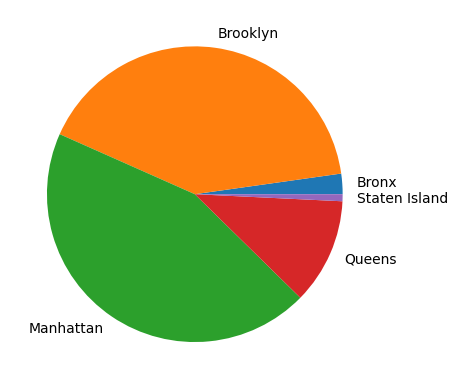

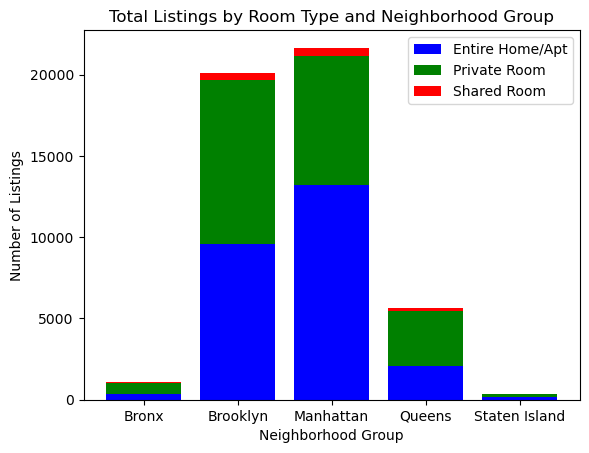

In [138]:
# There are five neighborhood groups, however, the majority of locations are in Manhattan and Brooklyn:
y = np.array([1091, 20104, 21661, 5666, 373])
mylabels = ['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island']
plt.pie(y, labels = mylabels)
plt.show()



# There are very few Shared Rooms listed, the majority of listings are a split between Entire Home/Apt and Private Room:
air_bnb_room_type_totals = air_bnb.copy()
air_bnb_room_type_totals['room_type_count'] = 1
air_bnb_room_type_totals = air_bnb_room_type_totals[['neighbourhood_group', 'room_type', 'room_type_count']].groupby(['neighbourhood_group', 'room_type']).count()
# air_bnb_room_type_totals
x = ['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island']
y1 = np.array([379, 9559, 13199, 2096, 176])
y2 = np.array([652, 10132, 7982, 3372, 188])
y3 = np.array([60, 413, 480, 198, 9])
plt.bar(x, y1, color = 'b')
plt.bar(x, y2, bottom = y1, color = 'g')
plt.bar(x, y3, bottom = y1 + y2, color = 'r')
plt.xlabel('Neighborhood Group')
plt.ylabel('Number of Listings')
plt.legend(['Entire Home/Apt', 'Private Room', 'Shared Room'])
plt.title('Total Listings by Room Type and Neighborhood Group')
plt.show()



# Michael is the busiest based on the number of reviews, having approximently 3,000 more than the person with the second most.
# There's a parallel between the # of listings and # of reviews. Of the top 5 in most reviews, four are also top 5 in listings. 



# Manhattan has the highest average price, driven primarily by having the most Entire Home/Apt room types listed.



# Entire Home/Apt room types are the most expensive. Of the top 110 most expensive locations, 90 are Entire Home/Apt (82%).


